# Importing Data


In [2]:
import pandas as pd
train_dataset = pd.read_csv("/Users/chris/Documents/Kaggle/Titanic/all/train.csv")
#test_dataset = pd.read_csv("/Users/chris/Documents/Kaggle Sentiment/Titanic/all/test.csv")
#full_data=pd.concat([train_dataset,test_dataset]).reset_index(drop=True)

In [3]:
train_dataset[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Categorical Variables:

Binary variables: Survived
    
Ordinal Variables: Pclass
    
Nominal Variable: Sex, Embarked, Cabin,  Name, Ticket


# Numerical Variables:

Continuous variables: Age, Fare

Discrete variables: Parch, SibSp

In [4]:
print(train_dataset.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
#univariate analysis


import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot('Survived',data=train_dataset,ax=axes[0,0])
sns.countplot('Pclass',data=train_dataset,ax=axes[0,1],hue = 'Survived')
sns.countplot('Sex',data=train_dataset,ax=axes[0,2],hue = 'Survived')
sns.countplot('SibSp',data=train_dataset,ax=axes[0,3],hue = 'Survived')
sns.countplot('Parch',data=train_dataset,ax=axes[1,0],hue = 'Survived')
sns.countplot('Embarked',data=train_dataset,ax=axes[1,1],hue = 'Survived')

sns.distplot(train_dataset['Fare'], kde=True,ax=axes[1,2])
#sns.distplot(train_dataset['Age'], kde=True,ax=axes[1,3])
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train_dataset.loc[(train_dataset['Survived'] == 0),'Fare'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train_dataset.loc[(train_dataset['Survived'] == 1),'Fare'] , color='g',shade=True, label='survived')



/Users/chris/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/chris/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


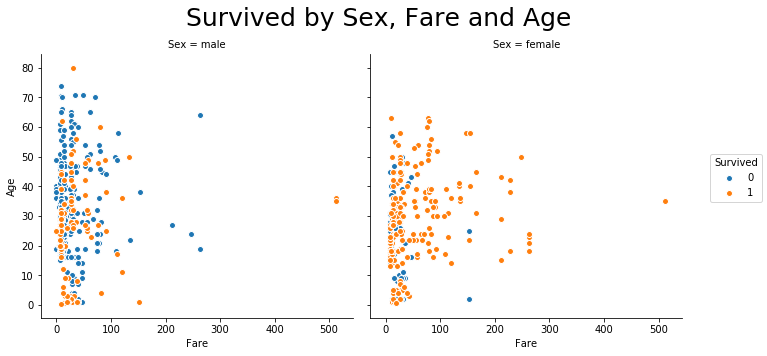

In [6]:
#Bivariate Analysis

g = sns.FacetGrid(train_dataset, size=5,hue="Survived", col ="Sex", margin_titles=True,
                )
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.fig.suptitle("Survived by Sex, Fare and Age", size = 25)
plt.subplots_adjust(top=0.85)

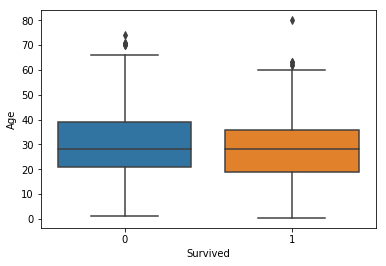

In [7]:

sns.boxplot(x="Survived", y="Age", data=train_dataset)


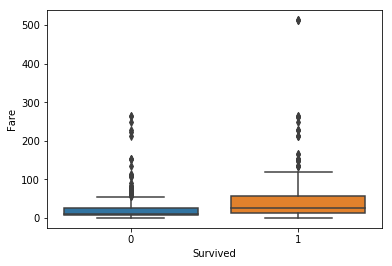

In [8]:
sns.boxplot(x="Survived", y="Fare", data=train_dataset)

# Findings:

No of female survivors are more than male.

Maximum num of non-survivors from PC class 3 and when family size = 0

Outliers in Fare with above 500 dollars

    
    

In [9]:
train_dataset[:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


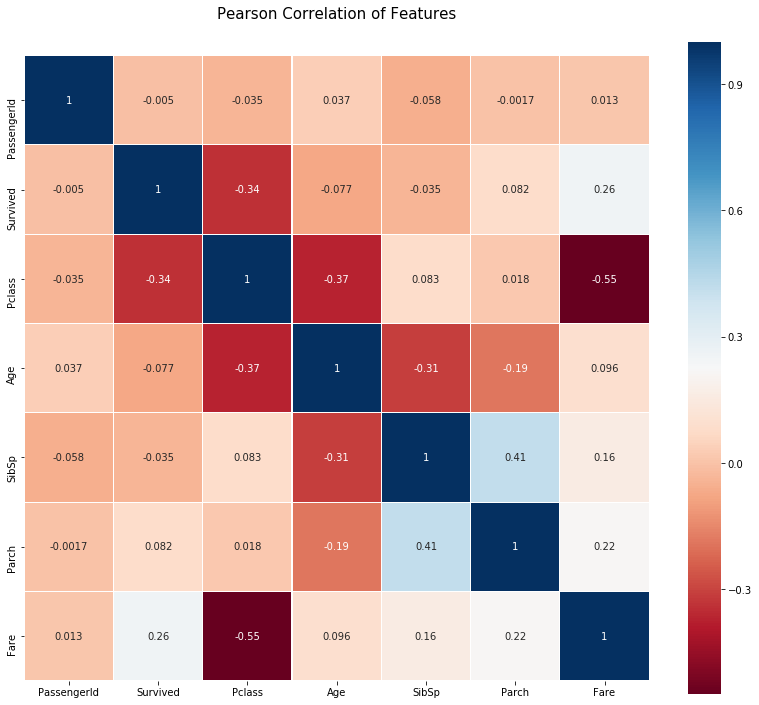

In [10]:
#corr_data=train_dataset.loc[:,train_dataset.columns.isin(['Age','Fare','Survived'])]
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_dataset.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# Findings:

Pclass have high correlation with Fare.


In [11]:
#sns.pairplot(corr_data,hue = 'Survived')
#train_dataset["name_len"]= train_dataset.Name.str.len()
train_dataset.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# Combining Data:

In [12]:
#train_x_dataset = train_dataset.loc[:,~train_dataset.columns.isin(['Survived'])]
#train_x_dataset['Survived'] = train_dataset['Survived']
test_dataset = pd.read_csv("/Users/chris/Documents/Kaggle Sentiment/Titanic/all/test.csv")
full_data=pd.concat([train_dataset,test_dataset]).reset_index(drop=True)
full_data[-2:]

/Users/chris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  after removing the cwd from sys.path.


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
1308,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


In [13]:
print(full_data.isna().sum())

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64


# Feature Engineering:

/Users/chris/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/chris/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64


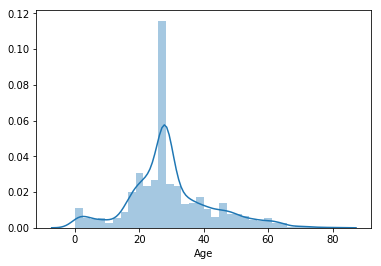

In [14]:
#missing age is replaced by median

full_data['Age'].fillna(full_data['Age'].median(), inplace=True)
sns.distplot(full_data['Age'], kde=True)
import statistics

#missing embarked is replaced by mode
full_data['Embarked'].fillna(statistics.mode(full_data["Embarked"]), inplace=True)

#missing fare is replaced by mean
full_data['Fare'].fillna(full_data['Fare'].mean(), inplace=True)
print(full_data.isna().sum())

In [15]:
#Removing columns that are not adding value

full_data = full_data.loc[:,~full_data.columns.isin(['PassengerId','Cabin'])]

In [16]:
#Removing columns that are not adding value

full_data["name_len"]= full_data.Name.str.len()
def get_title(dataset, feature_name):
    return dataset[feature_name].map(lambda name:name.split(',')[1].split('.')[0].strip())
full_data['Title'] = get_title(full_data, 'Name')
full_data[:2]

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,name_len,Title
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171,23,Mr
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599,51,Mrs


In [17]:
#Getting family size

full_data["Family_Size"]=full_data["Parch"]+full_data["SibSp"].astype(int)

In [18]:

full_data["Title"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Mlle              2
Major             2
Ms                2
Sir               1
Dona              1
Jonkheer          1
Don               1
Lady              1
Capt              1
Mme               1
the Countess      1
Name: Title, dtype: int64

In [19]:
#Binning

full_data["mod_Title"]=""
full_data.loc[ (full_data.Title=='Mr'),'mod_Title'] = 'Mr'
full_data.loc[ (full_data.Title=='Miss'),'mod_Title'] = 'Miss'
full_data.loc[ (full_data.Title=='Mrs'),'mod_Title'] = 'Mrs'
full_data.loc[ (full_data.Title=='Master'),'mod_Title'] = 'Master'
full_data.loc[ (full_data.mod_Title==''),'mod_Title'] = 'Other'
full_data["mod_Title"].value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
Other      34
Name: mod_Title, dtype: int64

In [20]:
#Attaching integer values to categories

full_data['Family_Size']=pd.to_numeric(full_data['Family_Size'])

full_data['Family'] = ""
full_data.loc[full_data['Family_Size'] == 0, 'Family'] = 'alone'
full_data.loc[(full_data['Family_Size'] > 0) & (full_data['Family_Size'] <= 3), 'Family'] = 'small'
full_data.loc[(full_data['Family_Size'] > 3) & (full_data['Family_Size'] <= 6), 'Family'] = 'medium'
full_data.loc[full_data['Family_Size'] > 6, 'Family'] = 'large'


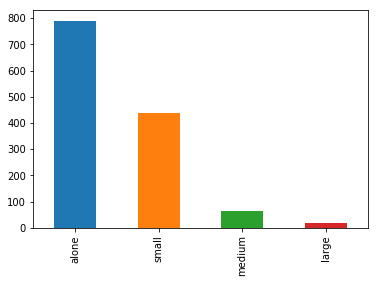

In [21]:
full_data['Family'].value_counts().plot(kind='bar')

In [22]:
#Encoding values

full_data['Sex']=full_data['Sex'].map({'male':0,'female':1}).astype(int)
full_data['Embarked']=full_data['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
full_data['Family']=full_data['Family'].map({'alone':0,'small':1,'medium':2,'large':3}).astype(int)

In [23]:
full_data[:3]

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,name_len,Title,Family_Size,mod_Title,Family
0,22.0,0,7.2500,"Braund, Mr. Owen Harris",0,3,0,1,0.0,A/5 21171,23,Mr,1,Mr,1
1,38.0,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,1,1.0,PC 17599,51,Mrs,1,Mrs,1
2,26.0,0,7.9250,"Heikkinen, Miss. Laina",0,3,1,0,1.0,STON/O2. 3101282,22,Miss,0,Miss,0


In [24]:

train=full_data[:len(train_dataset)]
test=full_data[-len(test_dataset):]
print(train.shape,"train")
print(test.shape,"test")

(891, 15) train
(418, 15) test


In [25]:
#Removing Outliers

train[train.Fare > 500]

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,name_len,Title,Family_Size,mod_Title,Family
258,35.0,1,512.3292,"Ward, Miss. Anna",0,1,1,0,1.0,PC 17755,16,Miss,0,Miss,0
679,36.0,1,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,0,0,1.0,PC 17755,34,Mr,1,Mr,1
737,35.0,1,512.3292,"Lesurer, Mr. Gustave J",0,1,0,0,1.0,PC 17755,22,Mr,0,Mr,0


In [26]:
train = train.drop(train[train.Fare > 500].index).reset_index(drop=True)
train[-2:]

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,name_len,Title,Family_Size,mod_Title,Family
886,26.0,1,30.00,"Behr, Mr. Karl Howell",0,1,0,0,1.0,111369,21,Mr,0,Mr,0
887,32.0,2,7.75,"Dooley, Mr. Patrick",0,3,0,0,0.0,370376,19,Mr,0,Mr,0


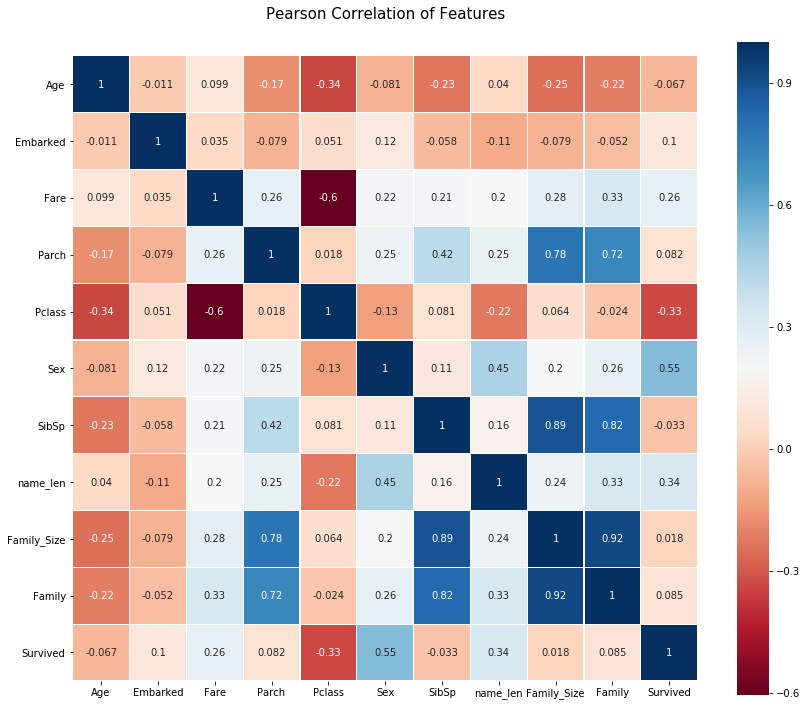

In [27]:
#Checking Correlation

trained = train.loc[:,~train.columns.isin(['Survived'])]
trained['Survived'] = train['Survived']
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(trained.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [28]:
trained.corr()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,name_len,Family_Size,Family,Survived
Age,1.000000,-0.010746,0.098801,-0.172623,-0.338998,-0.081203,-0.232732,0.040170,-0.245281,-0.215148,-0.067081
Embarked,-0.010746,1.000000,0.035497,-0.078641,0.051321,0.117097,-0.058472,-0.106982,-0.079242,-0.052317,0.102964
Fare,0.098801,0.035497,1.000000,0.263910,-0.604960,0.222361,0.211816,0.201259,0.276580,0.329865,0.261742
Parch,-0.172623,-0.078641,0.263910,1.000000,0.018212,0.247003,0.415141,0.251180,0.783198,0.719008,0.082157
Pclass,-0.338998,0.051321,-0.604960,0.018212,1.000000,-0.132881,0.080937,-0.222899,0.064413,-0.024207,-0.334068
Sex,-0.081203,0.117097,0.222361,0.247003,-0.132881,1.000000,0.114799,0.452058,0.201830,0.264658,0.545899
SibSp,-0.232732,-0.058472,0.211816,0.415141,0.080937,0.114799,1.000000,0.164778,0.890800,0.820944,-0.033395
name_len,0.040170,-0.106982,0.201259,0.251180,-0.222899,0.452058,0.164778,1.000000,0.238074,0.330840,0.335052
Family_Size,-0.245281,-0.079242,0.276580,0.783198,0.064413,0.201830,0.890800,0.238074,1.000000,0.920196,0.018211
Family,-0.215148,-0.052317,0.329865,0.719008,-0.024207,0.264658,0.820944,0.330840,0.920196,1.000000,0.085234


In [35]:
import numpy as np
columns_to_use=[]
def find_correlation_with_label(train_x):
    correlation = train_x.corr()
    list_corr = correlation['Survived']
    use = list(np.where(abs(list_corr) > 0.01))
    columns_to_use = train_x.columns[use]
    columns_to_use = columns_to_use[:len(columns_to_use)-1]
    return columns_to_use
print(find_correlation_with_label(trained))

Index(['Age', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex', 'SibSp',
       'Ticket', 'name_len'],
      dtype='object')


/Users/chris/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:2080: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [36]:
#Removing irrelevant variables

train_x = trained.loc[:,~trained.columns.isin(['Family_Size','Name','Parch','SibSp','Title','Survived'])]
train_y=trained['Survived']

In [37]:
test_x=test.loc[:,~test.columns.isin(['Family_Size','Name','Parch','SibSp','Title'])]
test[:2]

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,name_len,Title,Family_Size,mod_Title,Family
891,34.5,2,7.8292,"Kelly, Mr. James",0,3,0,0,NaN,330911,16,Mr,0,Mr,0
892,47.0,0,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,3,1,1,NaN,363272,32,Mrs,1,Mrs,1


In [38]:
test_x=test_x.loc[:,~test_x.columns.isin(['Survived'])]
print(train_x.shape,"train")
print(test_x.shape,"test")

(888, 9) train
(418, 9) test


In [39]:
#Dummies for categorical values

full_data=pd.concat([train_x,test_x]).reset_index(drop=True)
full_data=pd.get_dummies(full_data)

train_x=full_data[:len(trained)]
test_x=full_data[-len(test):]
print(train_x.shape,"train_x")
print(test_x.shape,"test_x")

(888, 941) train_x
(418, 941) test_x


In [40]:
train_x[:2]

,Age,Embarked,Fare,Pclass,Sex,name_len,Family,Ticket_110152,Ticket_110413,Ticket_110465,...,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,mod_Title_Master,mod_Title_Miss,mod_Title_Mr,mod_Title_Mrs,mod_Title_Other
0,22.0,0,7.2500,3,0,23,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38.0,1,71.2833,1,1,51,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


<Figure size 432x288 with 0 Axes>

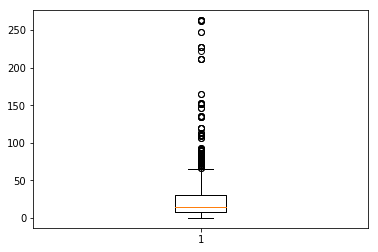

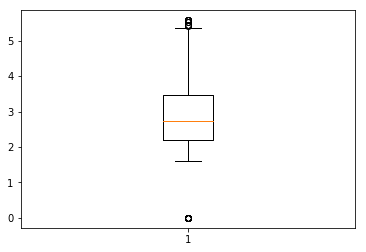

<Figure size 432x288 with 0 Axes>

In [41]:
#Log Transformations:
import math
plt.boxplot(train_x["Fare"])
plt.figure()
plt.boxplot([math.log(x+1) if x !=0 else 0 for x in train_x["Fare"] ])
plt.figure()


In [42]:
train_x[train_x["Family"]>2.5]

,Age,Embarked,Fare,Pclass,Sex,name_len,Family,Ticket_110152,Ticket_110413,Ticket_110465,...,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,mod_Title_Master,mod_Title_Miss,mod_Title_Mr,mod_Title_Mrs,mod_Title_Other
59,11.0,0,46.90,3,0,34,3,0,0,0,...,0,0,0,0,0,1,0,0,0,0
71,16.0,0,46.90,3,1,26,3,0,0,0,...,0,0,0,0,0,0,1,0,0,0
159,28.0,0,69.55,3,0,26,3,0,0,0,...,0,0,0,0,0,1,0,0,0,0
180,28.0,0,69.55,3,1,28,3,0,0,0,...,0,0,0,0,0,0,1,0,0,0
201,28.0,0,69.55,3,0,19,3,0,0,0,...,0,0,0,0,0,0,0,1,0,0
323,28.0,0,69.55,3,0,24,3,0,0,0,...,0,0,0,0,0,0,0,1,0,0
385,1.0,0,46.90,3,0,31,3,0,0,0,...,0,0,0,0,0,1,0,0,0,0
479,9.0,0,46.90,3,0,30,3,0,0,0,...,0,0,0,0,0,1,0,0,0,0
677,43.0,0,46.90,3,1,39,3,0,0,0,...,0,0,0,0,0,0,0,0,1,0
681,14.0,0,46.90,3,0,27,3,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
train_x["Fare"]=[math.log(x+1) if x !=0 else 0 for x in train_x["Fare"] ]
test_x["Fare"]=[math.log(x+1) if x !=0 else 0 for x in test_x["Fare"] ]

/Users/chris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/chris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:


#Removing Fare as it is correlated to Pclass
#test_x1=test_x.loc[:,~test_x.columns.isin(['Fare'])]
#train_x1=train_x.loc[:,~train_x.columns.isin(['Fare'])]

In [45]:
#!pip install plotly
import pandas as pd
import numpy as np
import re
import sklearn
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

# Going to use these 5 base models for the stacking
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.cross_validation import KFold

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [46]:

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=test_size, random_state=seed)
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.classifier import StackingClassifier

clf2 = RandomForestClassifier(random_state=1,n_estimators=50)
clf3 = GaussianNB()
clf4 = GradientBoostingClassifier()
clf5 = xgb.XGBClassifier(n_estimators = 10000,
                        max_depth = 10,
                        min_child_weight = 2,
                        subsample = 0.8505599690939889)
clf6 = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[clf2,clf3,clf4,clf5,clf6], 
                          meta_classifier=clf5)

# Fit
model=sclf.fit(X_train, y_train)

# Get your stacked features
preds = model.predict(X_test)
accuracy = accuracy_score(preds, y_test)
accuracy

0.8061224489795918

In [47]:
from sklearn.model_selection import cross_val_score


from mlxtend.classifier import EnsembleVoteClassifier
ada_boost = AdaBoostClassifier()
grad_boost = GradientBoostingClassifier()
xgb_boost = XGBClassifier()
boost_array = [ada_boost, grad_boost, xgb_boost]
eclf = EnsembleVoteClassifier(clfs=[ada_boost, grad_boost, xgb_boost], voting='soft')
labels = ['Ada Boost', 'Grad Boost', 'XG Boost', 'Ensemble']
for clf, label in zip([ada_boost, grad_boost, xgb_boost, eclf], labels):
    scores = cross_val_score(clf, train_x, train_y, cv=10, scoring='accuracy')
    print("Mean: {0:.3f}, std: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))

Mean: 0.818, std: (+/-) 0.030 [Ada Boost]
Mean: 0.827, std: (+/-) 0.039 [Grad Boost]
Mean: 0.830, std: (+/-) 0.035 [XG Boost]
Mean: 0.827, std: (+/-) 0.033 [Ensemble]


In [48]:
eclf.fit(train_x, train_y)

pred = eclf.predict(test_x)
predictions = [int(value) for value in pred]
results_df = pd.DataFrame(data={'PassengerId':test_dataset['PassengerId'], 'Survived':predictions})
print(pred[:10])
print(predictions[:10])
#results_df.to_csv('/Users/chris/Documents/Kaggle Sentiment/Titanic/all/submission_eclf.csv', index=False)

[0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
[0, 0, 0, 0, 0, 0, 1, 0, 1, 0]


In [529]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
svc = SVC()
from sklearn import grid_search
from sklearn.model_selection import GridSearchCV
svclassifier = SVC(kernel='linear',C=1)  
svclassifier.fit(X_train, y_train)
preds = svclassifier.predict(X_test)

acc_SVM = accuracy_score(y_test, preds)

print("the accuracy from classifying test set is:")
print(acc_SVM)

the accuracy from classifying test set is:
0.8197278911564626


In [530]:
# Get some classifiers to evaluate
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
seed = 1075
np.random.seed(seed)
# Create classifiers
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
knn = KNeighborsClassifier()
svc = SVC()
rg = RidgeClassifier()
clf_array = [rf, et, knn, svc, rg]
for clf in clf_array:
    vanilla_scores = cross_val_score(clf, train_x, train_y, cv=10, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf, 
       max_samples=0.4, random_state=seed)
    bagging_scores = cross_val_score(bagging_clf, train_x, train_y, cv=10, 
       n_jobs=-1)
    
    print("Mean of: {1:.3f}, std: (+/-) {2:.3f} [{0}]"  .format(clf.__class__.__name__, vanilla_scores.mean(), vanilla_scores.std()))
    print("Mean of: {1:.3f}, std: (+/-) {2:.3f} [Bagging {0}]\n".format(clf.__class__.__name__, bagging_scores.mean(), bagging_scores.std()))

Mean of: 0.829, std: (+/-) 0.040 [RandomForestClassifier]
Mean of: 0.836, std: (+/-) 0.045 [Bagging RandomForestClassifier]

Mean of: 0.829, std: (+/-) 0.037 [ExtraTreesClassifier]
Mean of: 0.833, std: (+/-) 0.043 [Bagging ExtraTreesClassifier]

Mean of: 0.740, std: (+/-) 0.038 [KNeighborsClassifier]
Mean of: 0.719, std: (+/-) 0.039 [Bagging KNeighborsClassifier]

Mean of: 0.710, std: (+/-) 0.054 [SVC]
Mean of: 0.699, std: (+/-) 0.046 [Bagging SVC]

Mean of: 0.850, std: (+/-) 0.028 [RidgeClassifier]
Mean of: 0.839, std: (+/-) 0.030 [Bagging RidgeClassifier]



In [531]:
from sklearn.ensemble import VotingClassifier
clf = [rf, et, knn, svc, rg]
eclf = VotingClassifier(estimators=[('Random Forests', rf), ('Extra Trees', et), ('KNeighbors', knn), ('SVC', svc), ('Ridge Classifier', rg)], voting='hard')
for clf, label in zip([rf, et, knn, svc, rg, eclf], ['Random Forest', 'Extra Trees', 'KNeighbors', 'SVC', 'Ridge Classifier', 'Ensemble']):
    scores = cross_val_score(clf, train_x, train_y, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.83 (+/- 0.04) [Random Forest]
Accuracy: 0.83 (+/- 0.03) [Extra Trees]
Accuracy: 0.74 (+/- 0.04) [KNeighbors]
Accuracy: 0.71 (+/- 0.05) [SVC]
Accuracy: 0.85 (+/- 0.03) [Ridge Classifier]
Accuracy: 0.84 (+/- 0.04) [Ensemble]
